In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from sklearn.decomposition import PCA   
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv(
    filepath_or_buffer="Jeux/Cars.csv",
    decimal=".", 
    sep=";"
)

In [14]:
print("Sur ce projet on a", dataset.shape[0], "voiture à vendre et accompagné", dataset.shape[1], "caractéristique(variables).")


Sur ce projet on a 193 voiture à vendre et accompagné 25 caractéristique(variables).


In [9]:
dataset.head()

,continent,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,...,peak-rpm,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
0,europe,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,...,5000,21,27,13495,88.6,168.8,64.1,48.8,2548,130
1,europe,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,...,5000,21,27,16500,88.6,168.8,64.1,48.8,2548,130
2,europe,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,...,5000,19,26,16500,94.5,171.2,65.5,52.4,2823,152
3,europe,audi,gas,std,four,sedan,fwd,front,ohc,four,...,5500,24,30,13950,99.8,176.6,66.2,54.3,2337,109
4,europe,audi,gas,std,four,sedan,4wd,front,ohc,five,...,5500,18,22,17450,99.4,176.6,66.4,54.3,2824,136


In [43]:
for v in dataset.columns:
    print((pd.DataFrame(dataset[v].describe()).T))
    print("____________________________________________________________________________")


          count unique   top freq
continent   193      3  asie  102
____________________________________________________________________________
     count unique     top freq
make   193     20  toyota   32
____________________________________________________________________________
          count unique  top freq
fuel-type   193      2  gas  174
____________________________________________________________________________
           count unique  top freq
aspiration   193      2  std  158
____________________________________________________________________________
             count unique   top freq
num-of-doors   193      2  four  112
____________________________________________________________________________
           count unique    top freq
body-style   193      5  sedan   92
____________________________________________________________________________
             count unique  top freq
drive-wheels   193      3  fwd  114
________________________________________________________

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          193 non-null    object 
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   engine-type        193 non-null    object 
 9   num-of-cylinders   193 non-null    object 
 10  fuel-system        193 non-null    object 
 11  bore               193 non-null    float64
 12  stroke             193 non-null    float64
 13  compression-ratio  193 non-null    float64
 14  horsepower         193 non-null    int64  
 15  peak-rpm           193 non-null    int64  
 16  city-mpg           193 non

In [19]:
array=dataset.values[:,11:24]
print(pearsonr(array[:,1], array[:,4]))

PearsonRResult(statistic=-0.06841959580719016, pvalue=0.3444295721729679)


In [20]:
model_acp=PCA()

acp = model_acp.fit_transform(array)
acp

array([[ 2.09550389e+02, -8.61158973e+01,  5.33670724e+01, ...,
        -8.55097649e-01,  4.68272398e-01,  1.26675144e-02],
       [ 3.21002282e+03, -1.94028812e+01,  2.04020585e+02, ...,
        -9.84007697e-01,  4.31624449e-01, -6.54100831e-04],
       [ 3.22514974e+03, -1.01987192e+02, -5.92107004e+01, ...,
         5.11942668e-02, -3.77988203e-01,  7.61927595e-01],
       ...,
       [ 8.20983687e+03,  4.27662460e+02, -1.39894015e+02, ...,
         2.99393877e-01,  4.82917420e-01, -6.86207090e-03],
       [ 9.20863522e+03, -2.79812503e+02, -7.27133290e+01, ...,
        -5.78388356e-01, -2.02983038e-02,  4.18056064e-01],
       [ 9.35136724e+03,  3.42346066e+02, -9.92743939e+01, ...,
         3.36250550e-01,  2.63628015e-01, -3.13244813e-01]])

In [25]:
comp1 = acp[:,0]
comp2 = acp[:,1]
comp3 = acp[:,3]
pearsonr(comp1, comp2)

PearsonRResult(statistic=7.101069507674944e-17, pvalue=1.0000000000000007)

In [30]:
model_acp.explained_variance_

array([6.56305943e+07, 2.32330739e+05, 6.87198267e+04, 3.76095209e+02,
       3.96672787e+01, 2.04484799e+01, 6.34760143e+00, 5.28238727e+00,
       2.88287541e+00, 9.28777363e-01, 7.24902676e-01, 8.75785082e-02,
       3.40463625e-02])

In [31]:
model_acp.explained_variance_ratio_

array([9.95427067e-01, 3.52378808e-03, 1.04228182e-03, 5.70428097e-06,
       6.01638357e-07, 3.10144538e-07, 9.62748295e-08, 8.01185989e-08,
       4.37249158e-08, 1.40868773e-08, 1.09946855e-08, 1.32831370e-09,
       5.16385249e-10])

In [33]:
model_acp.explained_variance_ratio_.cumsum()

array([0.99542707, 0.99895086, 0.99999314, 0.99999884, 0.99999944,
       0.99999975, 0.99999985, 0.99999993, 0.99999997, 0.99999999,
       1.        , 1.        , 1.        ])

In [35]:
model_acp.n_components_

13

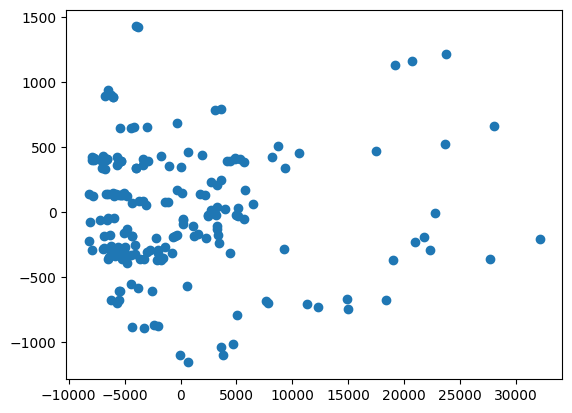

In [27]:
plt.scatter(comp1,comp2)
plt.show()